## 6.1 Lesni pozary

In [1]:
# import
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

# stabilizujme pseudonáhodný generátor
np.random.seed(23)

In [2]:
# precteme data
fires = pd.read_csv('data/forestfires.csv')

# podivejme se na data 
fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


<Axes: >

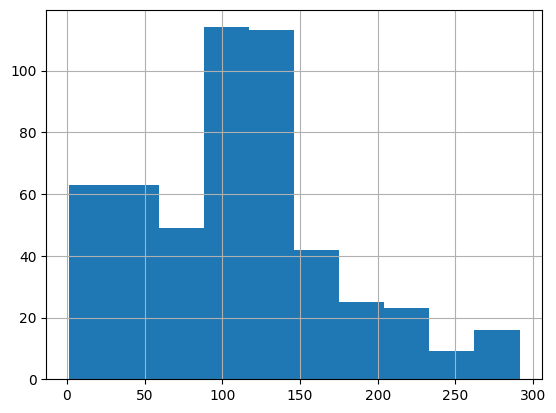

In [3]:
# Check the histogram normality (change the variables)
fires["DMC"].hist()

In [4]:
# mnozstvi mereni s oblasti vetsi nez 0 ha
print(len(fires))
print(len(fires[fires['area'] > 0]))

517
270


In [5]:
# sklearn má funkci train_test_split() - tvorba vlastní funkce slouží pouze k procvičení a pochopení algoritmu v pozadí
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]

    return data.iloc[train_indices], data.iloc[test_indices]

In [6]:
train_set, test_set = split_train_test(fires, 0.2)
print(len(train_set), "train +", len(test_set), "test")


414 train + 103 test


<Axes: >

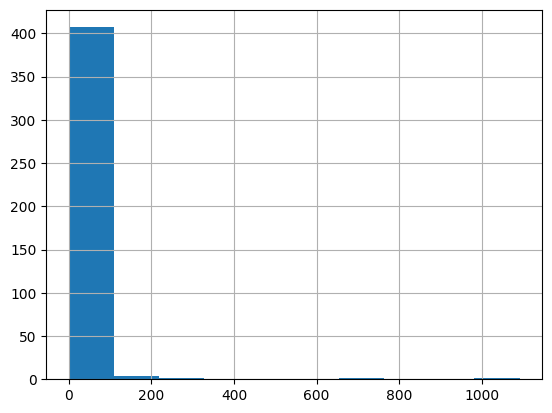

In [9]:
train_set['area'].hist()

<Axes: >

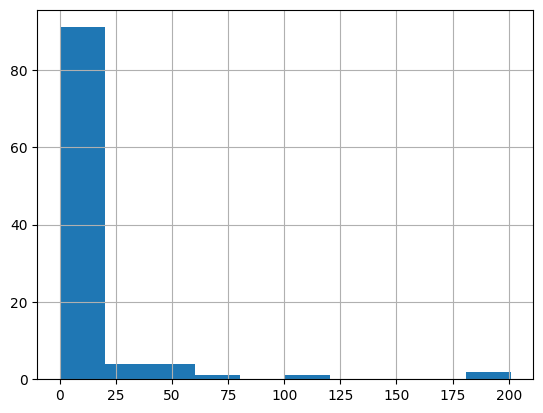

In [10]:
test_set['area'].hist()

In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(fires, test_size=0.2, random_state=23)

<Axes: >

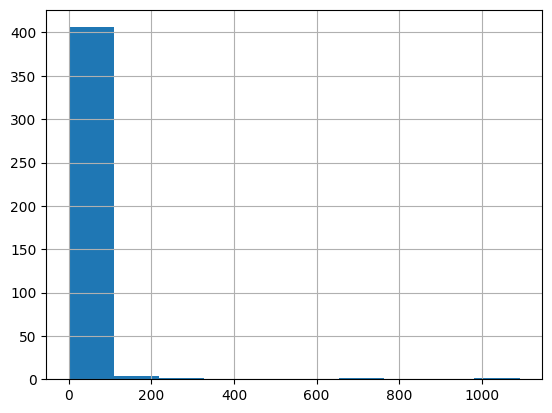

In [12]:
train_set['area'].hist()

<Axes: >

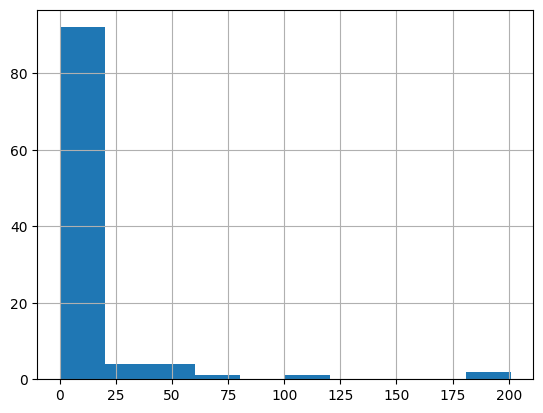

In [13]:
test_set['area'].hist()

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=23)

In [19]:
# ve vstupnich datech neocekavame 'area'
attributes_sel = [
    'X', 'Y', 'month', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain'
]
X = np.array(fires[attributes_sel])
# do y muzeme vlozit kategoricke tridy (1 == pozar, 0 == zadny pozar)
y = np.array((fires['area'] > 0))

In [20]:
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index)
    print("\nTEST:", test_index)

TRAIN: [124  20 197 484 175 236 435 289 398  54 303 486 391  87 463 293 432 208
  56  34 348 448   1 151 133 311 136 137 256 297 266 161 498 190 160  11
 214 245 429 174 209 374  47 352  19 513 150 331 276 260 335 146  85 338
 349 186 102 505 452 200 105 446 308 316 241 126 370 453 194  14 507  76
 112 482 421 292 138 401 362 363 346 140 430 199 188  17 447  96 465  93
 273 501 320 172 201 315 360 106 319 471 171 426 408 414 466 251 499   3
 347 500 213 462 454 337 420 433 339 198 488  10 332 478 101 473  69 134
 490 144 165 192 173 272 496 322 400 380 225 516 424 295 364  55 268 417
 207 485 265 224 358 405 228 114 324 226 442  66 167 369 183  33 184 494
 286 313   5 350 217 390 244 223 464 195  18 367 135 240 104  13 147  29
 239 253  60  84 449 283 444 302 220 353 368 127  73   4 232 120 145  68
 259 246 152  88 258 170 113  81  59  44 409 437 310 211 277 402 280 376
 479  67 382 235   2  72 389  92 189 159 460 510 515 132  71 377  45 457
 288 181  42 384 341  70  74 326  89 222 294

In [21]:
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

(array([20., 13., 10., 23., 19.,  5.,  4.,  5.,  2.,  3.]),
 array([  4.9 ,  33.54,  62.18,  90.82, 119.46, 148.1 , 176.74, 205.38,
        234.02, 262.66, 291.3 ]),
 <BarContainer object of 10 artists>)

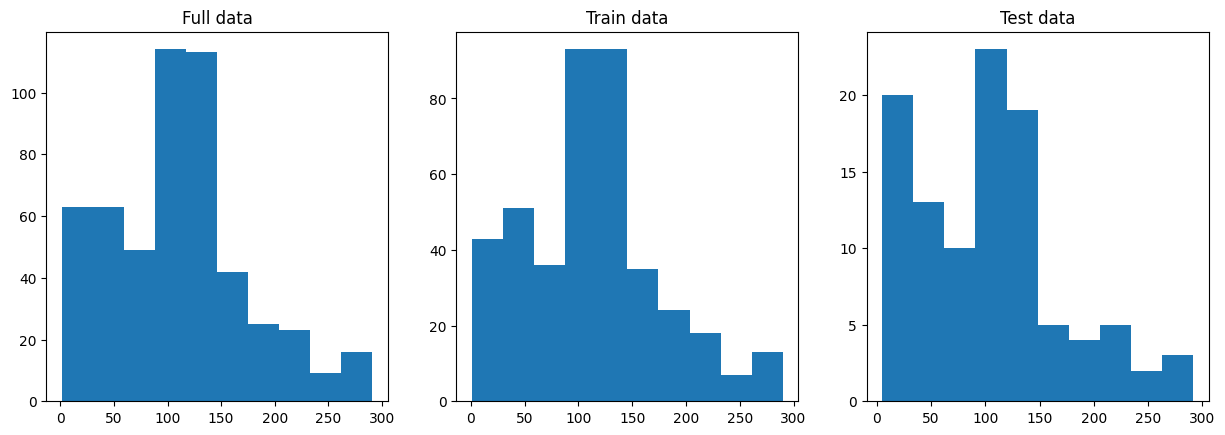

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_figwidth(15)

ax1.set_title('Full data')
ax1.hist(fires['DMC'])

X_train_df = pd.DataFrame(X_train, columns=attributes_sel)
ax2.set_title('Train data')
ax2.hist(X_train_df['DMC'])

X_test_df = pd.DataFrame(X_test, columns=attributes_sel)
ax3.set_title('Test data')
ax3.hist(X_test_df['DMC'])

In [30]:


bins = np.linspace(0, 500, 5)
print(bins)


[  0. 125. 250. 375. 500.]


In [31]:


len(fires.index)


517

<Axes: >

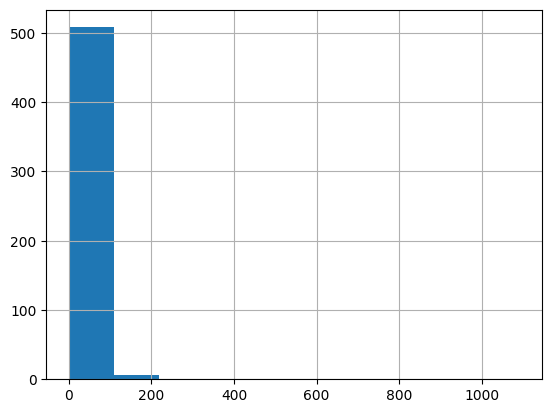

In [32]:


fires['area'].hist()


<Axes: >

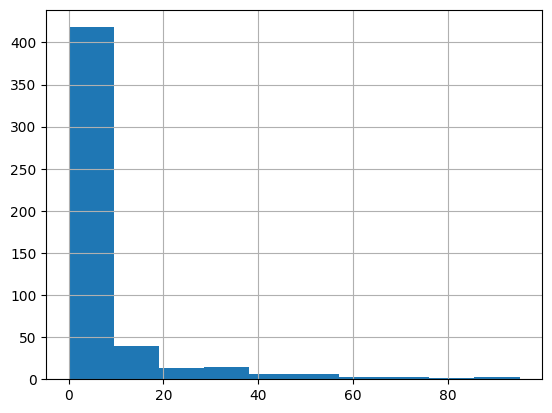

In [33]:
fires[fires['area']<100]['area'].hist()

<Axes: >

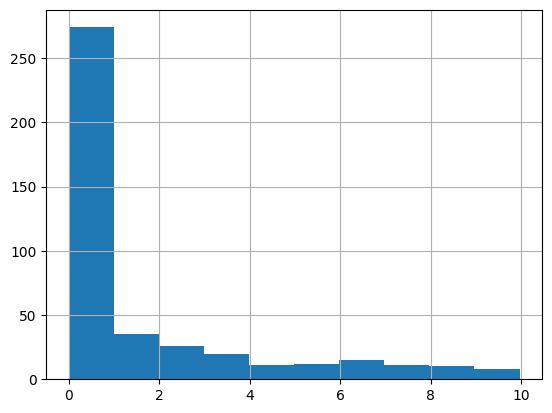

In [34]:
fires[fires['area']<10]['area'].hist()

In [35]:
# vytvorme oddily dat podle y
y = np.array(fires['area'])
bins = [0, 1, 10]
y_binned = np.digitize(y, bins)

In [36]:
# vyuzijme jiz znamou funkci train_test_split, s definovanym argumentem stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y_binned
)


In [37]:


X_train


array([[1, 2, 'aug', ..., 47, 0.9, 0.0],
       [8, 6, 'aug', ..., 41, 3.6, 0.0],
       [1, 4, 'sep', ..., 28, 4.0, 0.0],
       ...,
       [6, 4, 'feb', ..., 77, 5.4, 0.0],
       [7, 3, 'oct', ..., 27, 4.0, 0.0],
       [7, 4, 'sep', ..., 77, 4.0, 0.0]], dtype=object)

(array([24., 17., 15., 29., 36., 11.,  7.,  9.,  3.,  5.]),
 array([  2.4 ,  31.16,  59.92,  88.68, 117.44, 146.2 , 174.96, 203.72,
        232.48, 261.24, 290.  ]),
 <BarContainer object of 10 artists>)

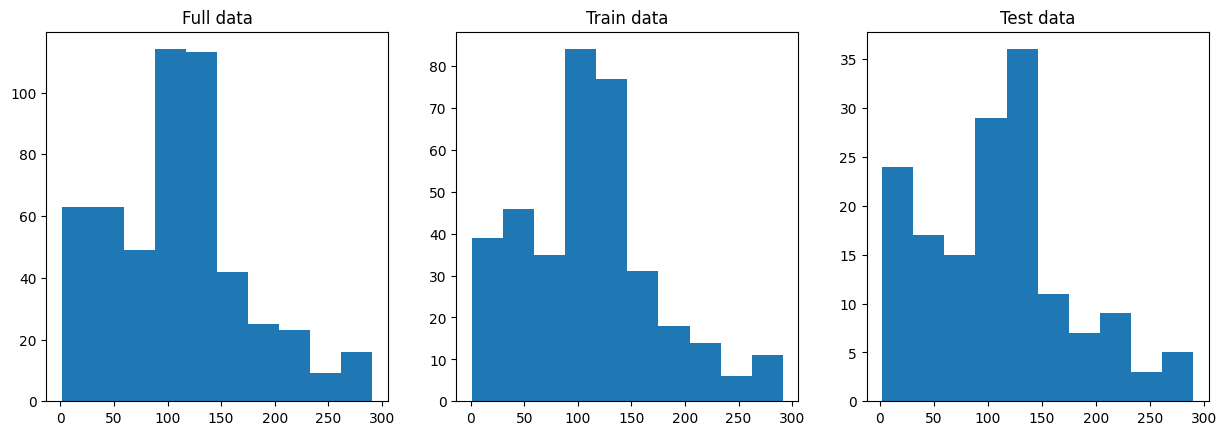

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_figwidth(15)

ax1.set_title('Full data')
ax1.hist(fires['DMC'])

X_train_df = pd.DataFrame(X_train, columns=attributes_sel)
ax2.set_title('Train data')
ax2.hist(X_train_df['DMC'])

X_test_df = pd.DataFrame(X_test, columns=attributes_sel)
ax3.set_title('Test data')
ax3.hist(X_test_df['DMC'])

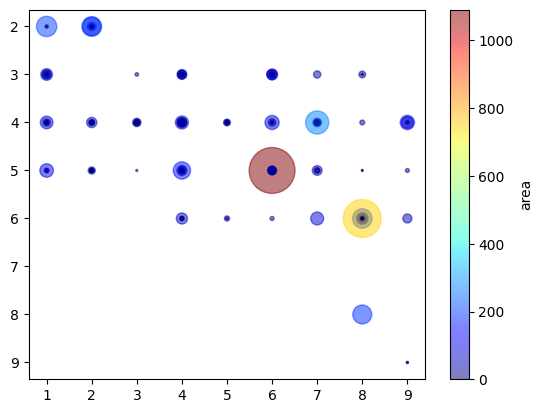

In [39]:
plt.scatter(
    fires['X'], fires['Y'],
    c=fires['area'], s=fires['area'], cmap="jet",  # barvu a velikost urcuje rozsireni pozaru
    alpha=0.5  # vice pozaru mohlo vzniknout na tomtez miste
)

# y souradnice jde shora dolu, viz [Cortez and Morais, 2007]
plt.gca().invert_yaxis()
plt.colorbar(label="area")
plt.show()

In [41]:
fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [42]:
# korelacni matice
corr_matrix = fires[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']].corr() 
corr_matrix["area"].sort_values(ascending=False) 

area    1.000000
temp    0.097844
DMC     0.072994
DC      0.049383
FFMC    0.040122
wind    0.012317
ISI     0.008258
rain   -0.007366
RH     -0.075519
Name: area, dtype: float64

In [43]:
# data ve sloupcich 'day' a 'month' musime prevest na cisla
days = [
    'mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'
]
months = [
    'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'
]

for i, day in enumerate(days):
    fires.loc[fires['day'] == day, 'day'] = i
for i, month in enumerate(months):
    fires.loc[fires['month'] == month, 'month'] = i

In [45]:
# korelacni matice
corr_matrix = fires[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'day', 'month', 'area']].corr() 
corr_matrix["area"].sort_values(ascending=False) 

area     1.000000
temp     0.097844
DMC      0.072994
month    0.056496
DC       0.049383
FFMC     0.040122
day      0.023226
wind     0.012317
ISI      0.008258
rain    -0.007366
RH      -0.075519
Name: area, dtype: float64

array([[<Axes: xlabel='temp', ylabel='temp'>,
        <Axes: xlabel='DMC', ylabel='temp'>,
        <Axes: xlabel='RH', ylabel='temp'>,
        <Axes: xlabel='area', ylabel='temp'>],
       [<Axes: xlabel='temp', ylabel='DMC'>,
        <Axes: xlabel='DMC', ylabel='DMC'>,
        <Axes: xlabel='RH', ylabel='DMC'>,
        <Axes: xlabel='area', ylabel='DMC'>],
       [<Axes: xlabel='temp', ylabel='RH'>,
        <Axes: xlabel='DMC', ylabel='RH'>,
        <Axes: xlabel='RH', ylabel='RH'>,
        <Axes: xlabel='area', ylabel='RH'>],
       [<Axes: xlabel='temp', ylabel='area'>,
        <Axes: xlabel='DMC', ylabel='area'>,
        <Axes: xlabel='RH', ylabel='area'>,
        <Axes: xlabel='area', ylabel='area'>]], dtype=object)

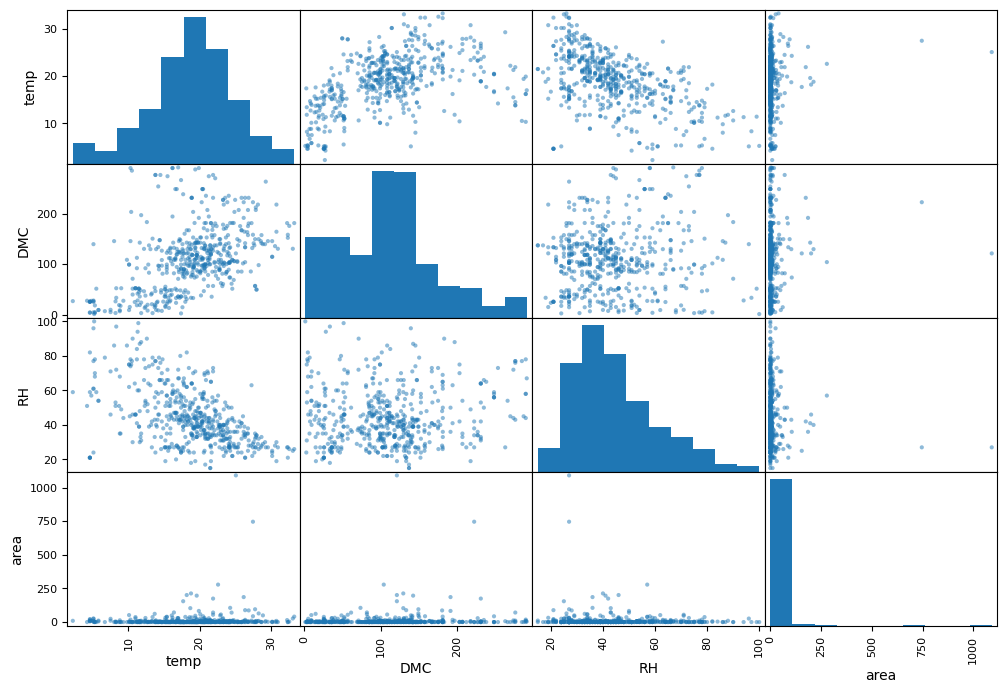

In [48]:
from pandas.plotting import scatter_matrix

attributes = ["temp", "DMC", "RH", "area"]
scatter_matrix(fires[attributes], figsize=(12, 8), alpha=0.5)

In [49]:
fires_features = fires.drop("area", axis=1) 
fires_area = fires["area"].copy()
fires_area.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: area, dtype: float64

In [50]:
fires_features.drop("day", inplace=True, axis=1)

In [51]:
fires_features.head(10)

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,2,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,9,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,9,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,2,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,2,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
5,8,6,7,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0
6,8,6,7,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0
7,8,6,7,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0
8,8,6,8,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0
9,7,5,8,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0


In [52]:
# jake radky obsahuji nan hodnotu?
sample_incomplete_rows = fires_features[
    fires_features.isnull().any(axis=1)
]
sample_incomplete_rows

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain


In [53]:
sample_incomplete_rows

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain


In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(
    fires_features, test_size=0.3, random_state=23
)
y_train, y_test = train_test_split(
    fires_area, test_size=0.3, random_state=23
)

y_test.head()


156     1.61
337    56.04
161     1.90
442     3.35
392    70.76
Name: area, dtype: float64

### Výběr a trénování modelu¶

In [73]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

# tree_reg = DecisionTreeRegressor(random_state=23)
tree_reg = RandomForestRegressor(random_state=23) 

In [74]:
# prvni, pokusny trenink
tree_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=23)

In [75]:
# predikce
fires_predictions = tree_reg.predict(X_test)

In [76]:
# prvni zhodnoceni pomoci RMSE
from sklearn.metrics import mean_squared_error

tree_mse = mean_squared_error(y_test, fires_predictions)
tree_rmse = np.sqrt(tree_mse)
print(round(tree_rmse, 2))

66.17


In [77]:
from sklearn.metrics import mean_absolute_error

tree_mae = mean_absolute_error(y_test, fires_predictions)
print(round(tree_mae, 2))

23.27


In [78]:
from sklearn.model_selection import cross_val_score

# Decision Tree regressor 
scores = cross_val_score(
    tree_reg, X_train, y_train, scoring="neg_mean_absolute_error", cv=10
)
tree_mae_scores = (-scores)

In [79]:
def display_scores(scores):
    # print("Scores:", scores)
    print("Mean MAE:", round(scores.mean(), 2))
    print("Standard deviation:", round(scores.std(), 2))

display_scores(tree_mae_scores)

Mean MAE: 20.7
Standard deviation: 8.05


In [114]:
from sklearn.model_selection import GridSearchCV

# the model hyper-parameters 
# help: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html 
# DecisionTreeRegressor(splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, ...)

param_grid = [
    {
        'max_depth': [3, 4], 
        'min_samples_split': [3, 4,], 
        'n_estimators': [5, 10, 20, 50, 70]
    }
]

# grid seach application
tree_reg = RandomForestRegressor(random_state=23)

# cv - petinasobna krizova validace, tedy cv * max_depth epoch
grid_search = GridSearchCV(
    tree_reg, param_grid, cv=10, scoring="neg_mean_absolute_error", return_train_score=True
)


In [115]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=23),
             param_grid=[{'max_depth': [3, 4], 'min_samples_split': [3, 4],
                          'n_estimators': [5, 10, 20, 50, 70]}],
             return_train_score=True, scoring='neg_mean_absolute_error')

In [121]:
grid_search.best_params_

{'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 5}

In [122]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

16.949612307600376 {'max_depth': 3, 'min_samples_split': 3, 'n_estimators': 5}
17.27914181879647 {'max_depth': 3, 'min_samples_split': 3, 'n_estimators': 10}
17.57478797256834 {'max_depth': 3, 'min_samples_split': 3, 'n_estimators': 20}
18.347644210204855 {'max_depth': 3, 'min_samples_split': 3, 'n_estimators': 50}
18.073744549190273 {'max_depth': 3, 'min_samples_split': 3, 'n_estimators': 70}
16.919957598605667 {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 5}
17.22972557541023 {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 10}
17.565168557882643 {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 20}
18.34690358697448 {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 50}
18.07427550792962 {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 70}
18.104739338642457 {'max_depth': 4, 'min_samples_split': 3, 'n_estimators': 5}
18.355317021999433 {'max_depth': 4, 'min_samples_split': 3, 'n_estimators': 10}
18.99008732131058 {'max_depth': 4, 'min_samples_

In [105]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'max_depth': randint(low=3, high=10),
    'min_samples_split': randint(low=3, high=10),
}

tree_reg = RandomForestRegressor(random_state=23)

rnd_search = RandomizedSearchCV(
    tree_reg, param_distributions=param_distribs, n_iter=10,
    cv=10, scoring="neg_mean_absolute_error", random_state=23
)

rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=23),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x12c4cb3d0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x12c4cb670>},
                   random_state=23, scoring='neg_mean_absolute_error')

In [106]:
rnd_search.best_estimator_

RandomForestRegressor(max_depth=3, min_samples_split=4, random_state=23)

In [107]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

19.08347818193593 {'max_depth': 6, 'min_samples_split': 9}
18.336192474020134 {'max_depth': 3, 'min_samples_split': 4}
20.321179604232 {'max_depth': 9, 'min_samples_split': 3}
19.58923426130343 {'max_depth': 8, 'min_samples_split': 7}
19.67989010191183 {'max_depth': 6, 'min_samples_split': 5}
18.838908398924033 {'max_depth': 4, 'min_samples_split': 6}
19.937262131317794 {'max_depth': 9, 'min_samples_split': 6}
19.58923426130343 {'max_depth': 8, 'min_samples_split': 7}
19.064063816492432 {'max_depth': 4, 'min_samples_split': 5}
19.05902646309155 {'max_depth': 6, 'min_samples_split': 8}


In [108]:
# Select the model and evaluate it with test set!
sel_model = grid_search.best_estimator_
sel_predictions = sel_model.predict(X_test)
print('MAE: {}'.format(round(mean_absolute_error(y_test,  sel_predictions), 2)))

MAE: 18.96


In [109]:
# Select final model and evaluate it with test set!
sel_model = rnd_search.best_estimator_
sel_predictions = sel_model.predict(X_test)
print('MAE: {}'.format(round(mean_absolute_error(y_test,  sel_predictions), 2)))

MAE: 20.03


In [116]:
from numpy import mean, absolute

def mad(data, axis=None):
    return mean(absolute(data - mean(data, axis)), axis)

In [117]:
mad(fires_predictions)

14.511606540927023

In [119]:
y_test_pred = rnd_search.best_estimator_.predict(X_test)

In [120]:
mad(y_test_pred)

8.525502864461961

In [124]:
grid_search.best_estimator_.feature_importances_

array([0.04929196, 0.19654905, 0.08801497, 0.        , 0.234196  ,
       0.03910114, 0.06111778, 0.2176938 , 0.01874761, 0.0952877 ,
       0.        ])

In [125]:
fires_features.head(10)

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,2,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,9,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,9,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,2,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,2,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
5,8,6,7,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0
6,8,6,7,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0
7,8,6,7,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0
8,8,6,8,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0
9,7,5,8,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0


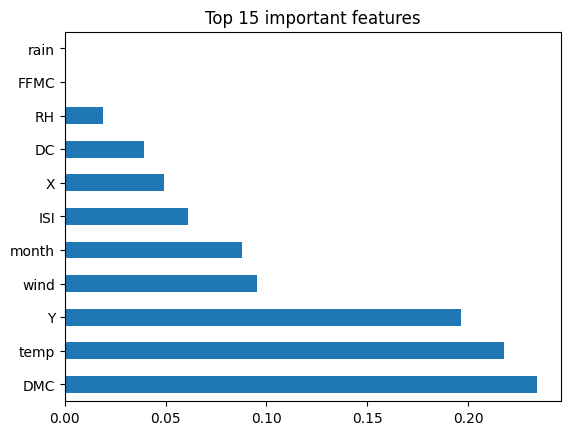

In [127]:
feat_importances = pd.Series(grid_search.best_estimator_.feature_importances_, index=fires_features.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()